In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


drivers = pd.read_csv('drivers.csv')
circuits = pd.read_csv('circuits.csv')
results = pd.read_csv('results.csv')
races=pd.read_csv('races.csv')
imp_df = [circuits, drivers,  results,races]


for df in imp_df:
    df.replace('\\N', np.nan, inplace=True)
    print(df.dtypes)    
    
races.drop(columns=['fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time','time'],inplace=True)




circuitId       int64
circuitRef     object
name           object
location       object
country        object
lat           float64
lng           float64
alt             int64
url            object
dtype: object
driverId        int64
driverRef      object
number         object
code           object
forename       object
surname        object
dob            object
nationality    object
url            object
dtype: object
resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number              object
grid                 int64
position            object
positionText        object
positionOrder        int64
points             float64
laps                 int64
time                object
milliseconds        object
fastestLap          object
rank                object
fastestLapTime      object
fastestLapSpeed     object
statusId             int64
dtype: object
raceId          int64
year            int64
round           int64
circuitId 

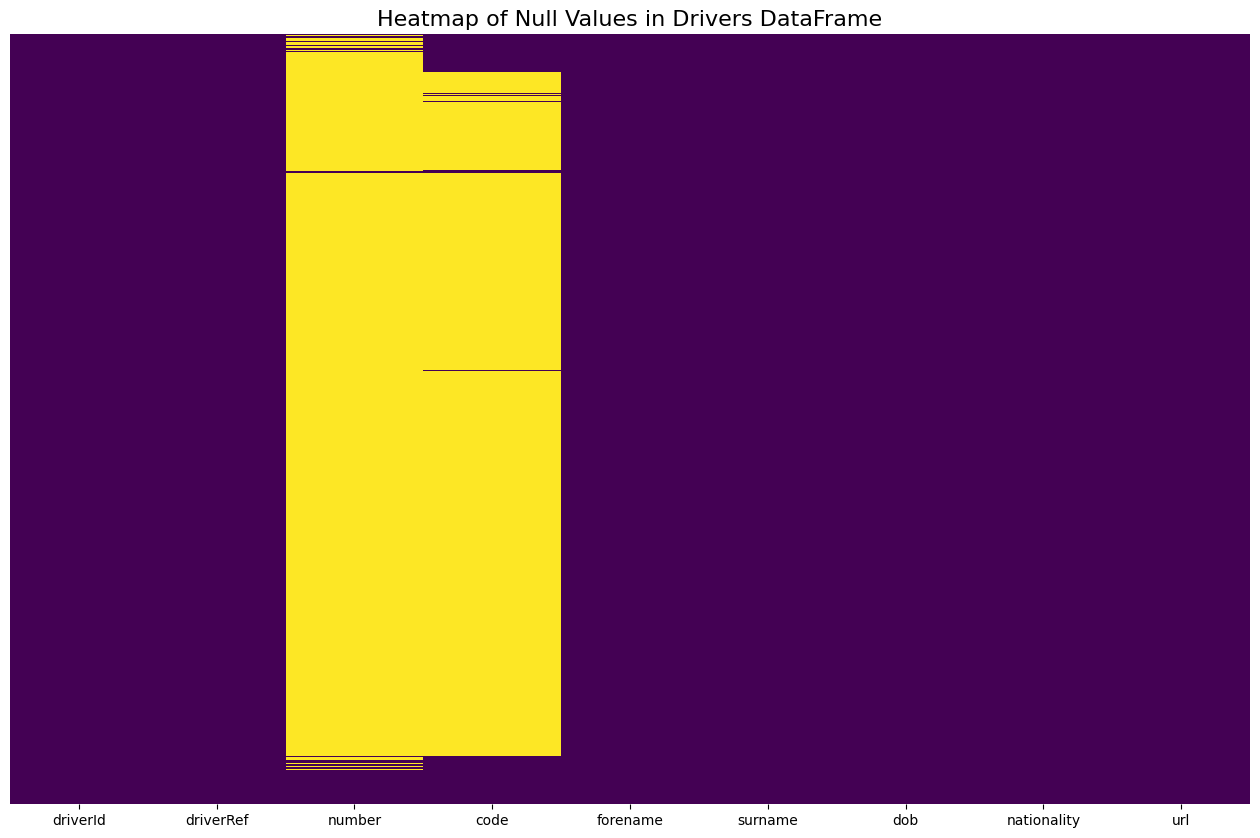

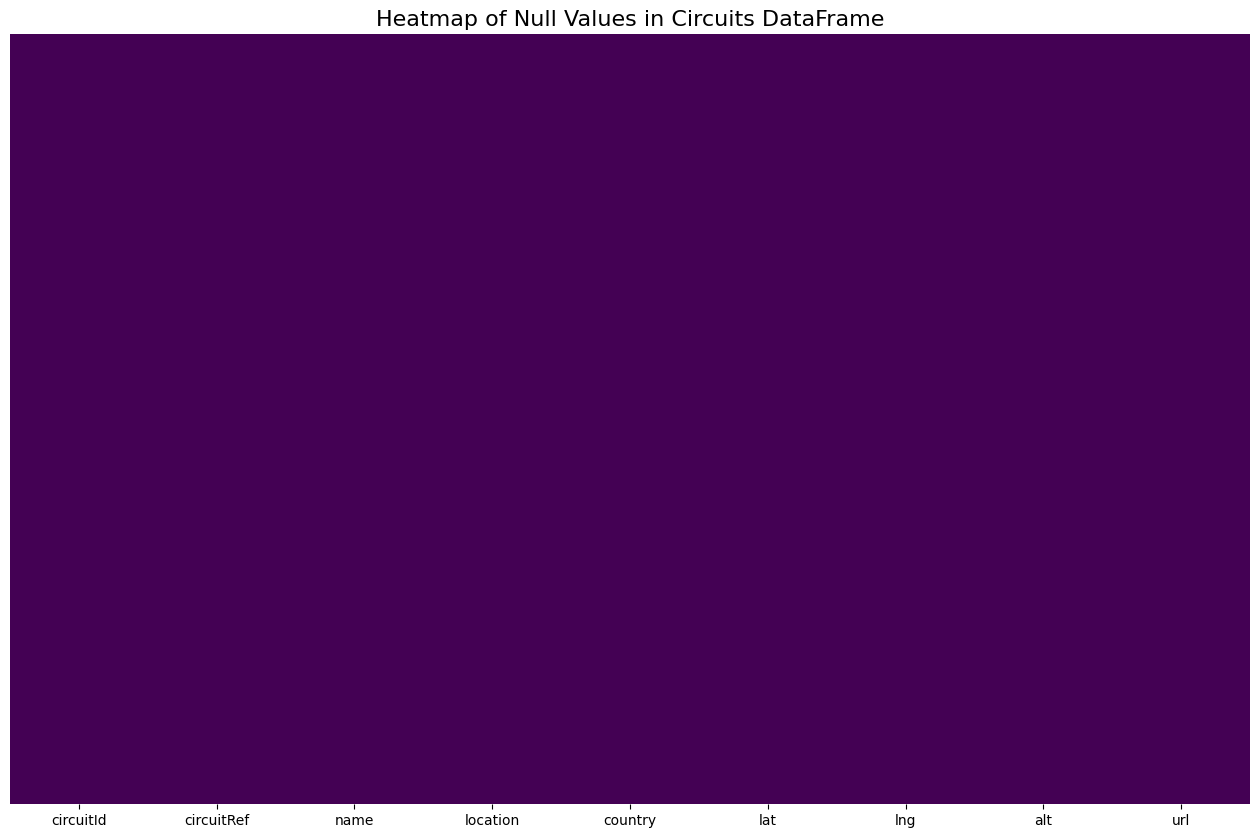

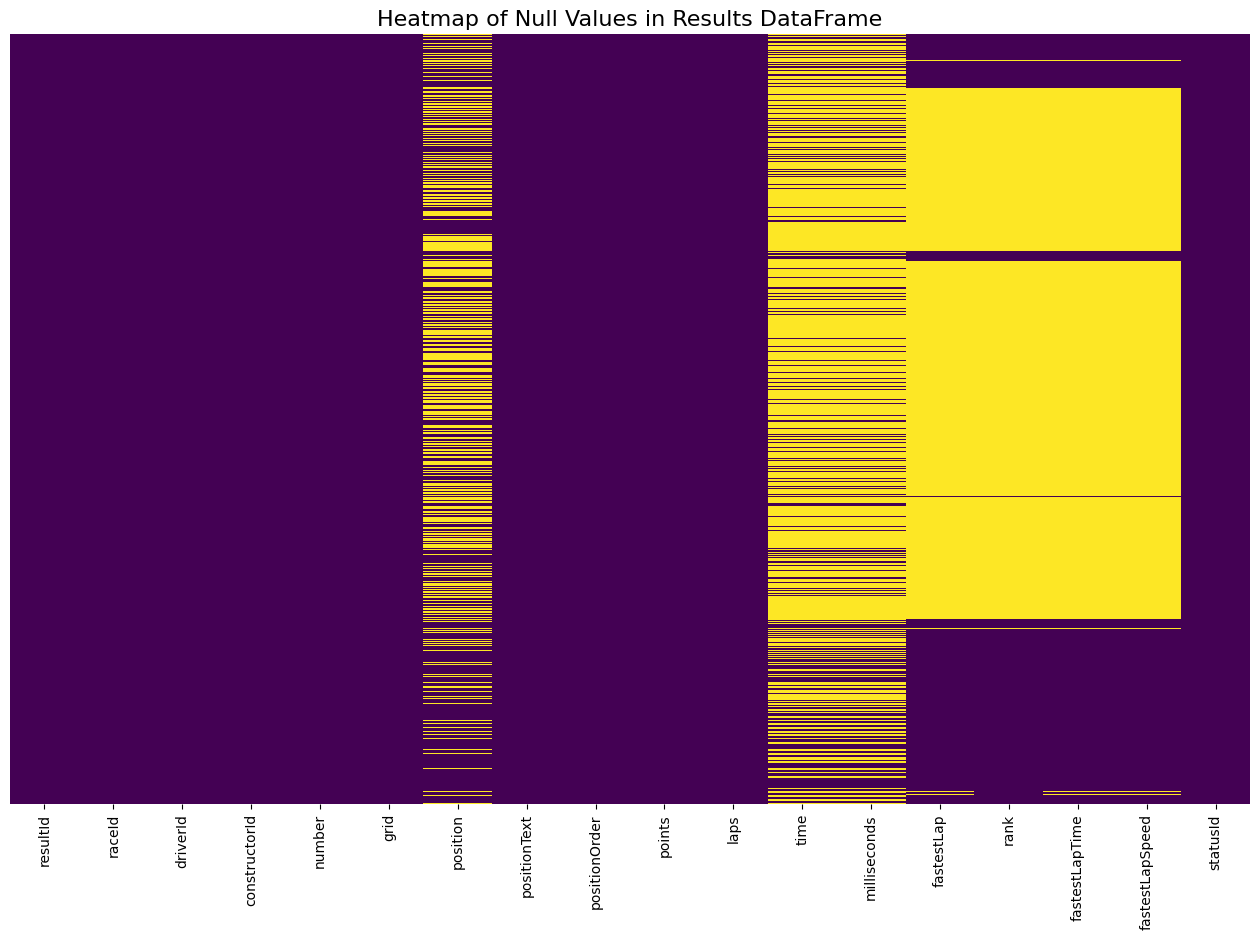

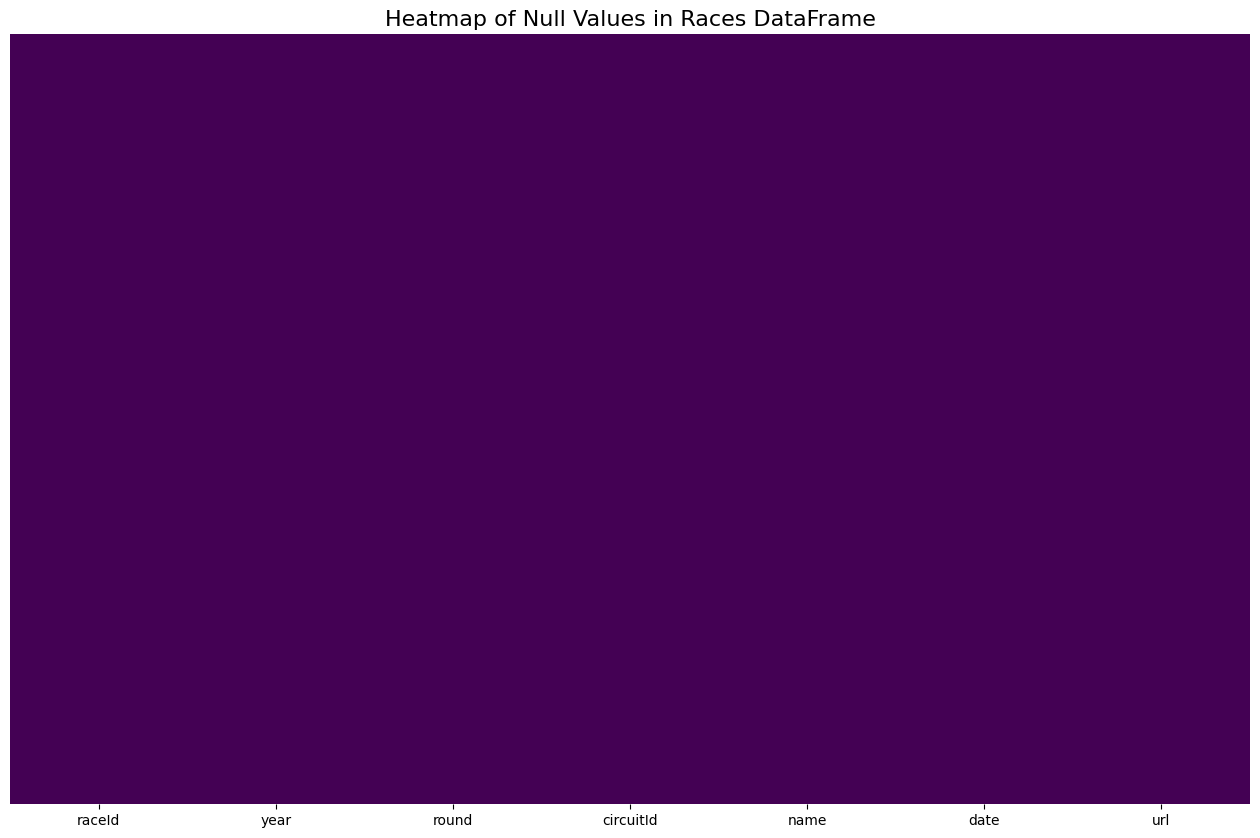

In [2]:
plt.figure(figsize=(16, 10))

# Create a heatmap to visualize null values
sns.heatmap(drivers.isnull(), cbar=False, cmap='viridis', yticklabels=False)

# Add title and display the heatmap
plt.title('Heatmap of Null Values in Drivers DataFrame', fontsize=16)
plt.show()
plt.figure(figsize=(16, 10))

# Create a heatmap to visualize null values
sns.heatmap(circuits.isnull(), cbar=False, cmap='viridis', yticklabels=False)

# Add title and display the heatmap
plt.title('Heatmap of Null Values in Circuits DataFrame', fontsize=16)
plt.show()
plt.figure(figsize=(16, 10))

# Create a heatmap to visualize null values
sns.heatmap(results.isnull(), cbar=False, cmap='viridis', yticklabels=False)

# Add title and display the heatmap
plt.title('Heatmap of Null Values in Results DataFrame', fontsize=16)
plt.show()
plt.figure(figsize=(16, 10))

# Create a heatmap to visualize null values
sns.heatmap(races.isnull(), cbar=False, cmap='viridis', yticklabels=False)

# Add title and display the heatmap
plt.title('Heatmap of Null Values in Races DataFrame', fontsize=16)
plt.show()


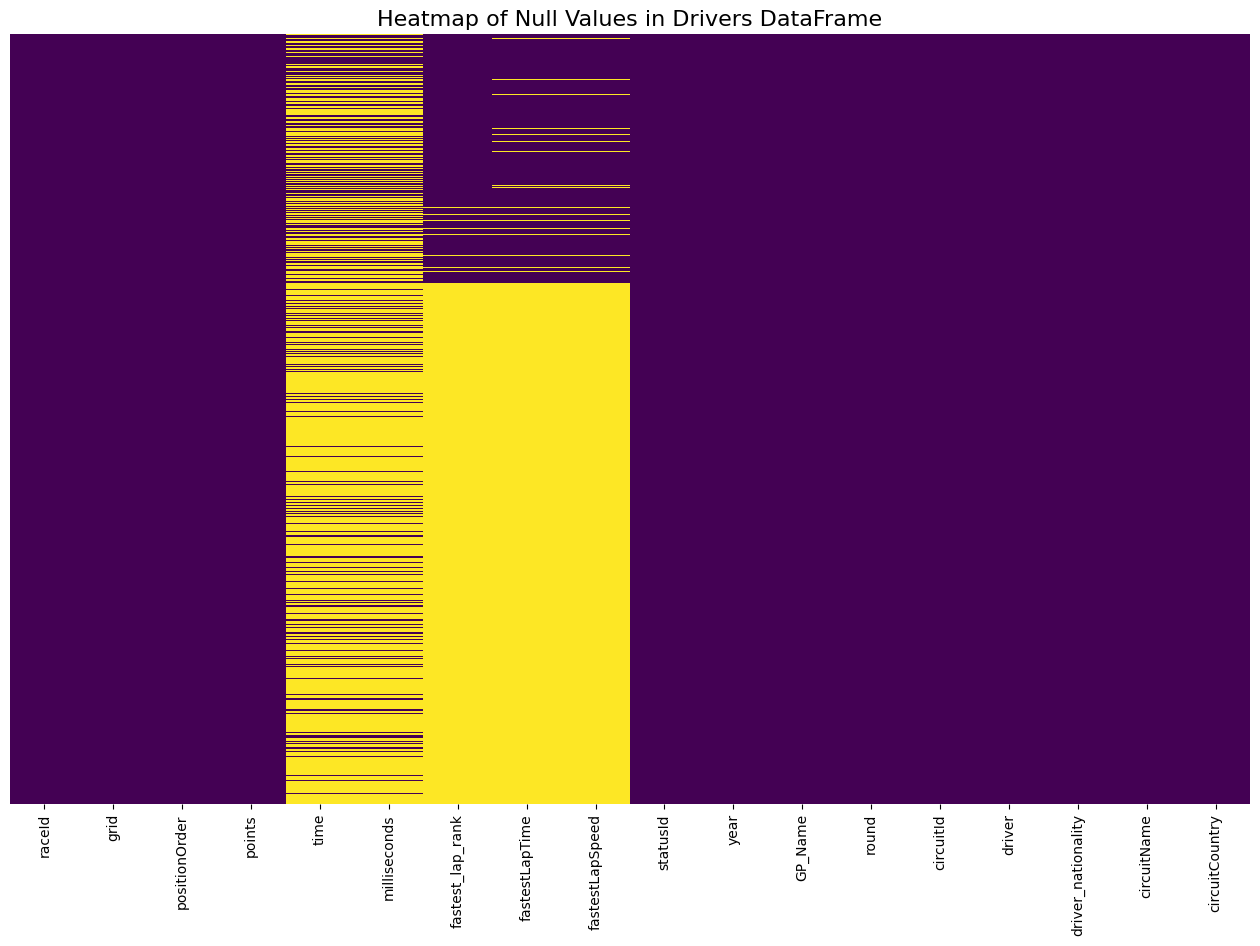

In [3]:
df=pd.merge(results,races[['raceId','year','name','round','circuitId']],on='raceId',how='left')
df=pd.merge(df,drivers[['driverId','driverRef','nationality']],on='driverId',how='left')
df=pd.merge(df,circuits[['circuitId','name','country']],on='circuitId',how='left')
df=df.sort_values(by=['year','round','positionOrder'],ascending=[False,True,True])
df.drop(columns=['number','position','positionText','laps','fastestLap','resultId','driverId','constructorId'],axis=1,inplace=True)
df.rename(columns={'rank':'fastest_lap_rank','name_x':'GP_Name','nationality':'driver_nationality','name_y':'circuitName','driverRef':'driver','country':'circuitCountry'},inplace=True)

plt.figure(figsize=(16, 10))

# Create a heatmap to visualize null values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)

# Add title and display the heatmap
plt.title('Heatmap of Null Values in Drivers DataFrame', fontsize=16)
plt.show()


                        circuitName  total_races
0      Autodromo Nazionale di Monza           74
1                 Circuit de Monaco           70
2               Silverstone Circuit           59
3      Circuit de Spa-Francorchamps           57
4         Circuit Gilles Villeneuve           43
..                              ...          ...
72            Monsanto Park Circuit            1
73                  Pescara Circuit            1
74  Riverside International Raceway            1
75    Sebring International Raceway            1
76                          Zeltweg            1

[77 rows x 2 columns]


/tmp/ipykernel_218638/220146023.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=races_per_circuit, x='circuitName', y='total_races', palette='Blues_d')


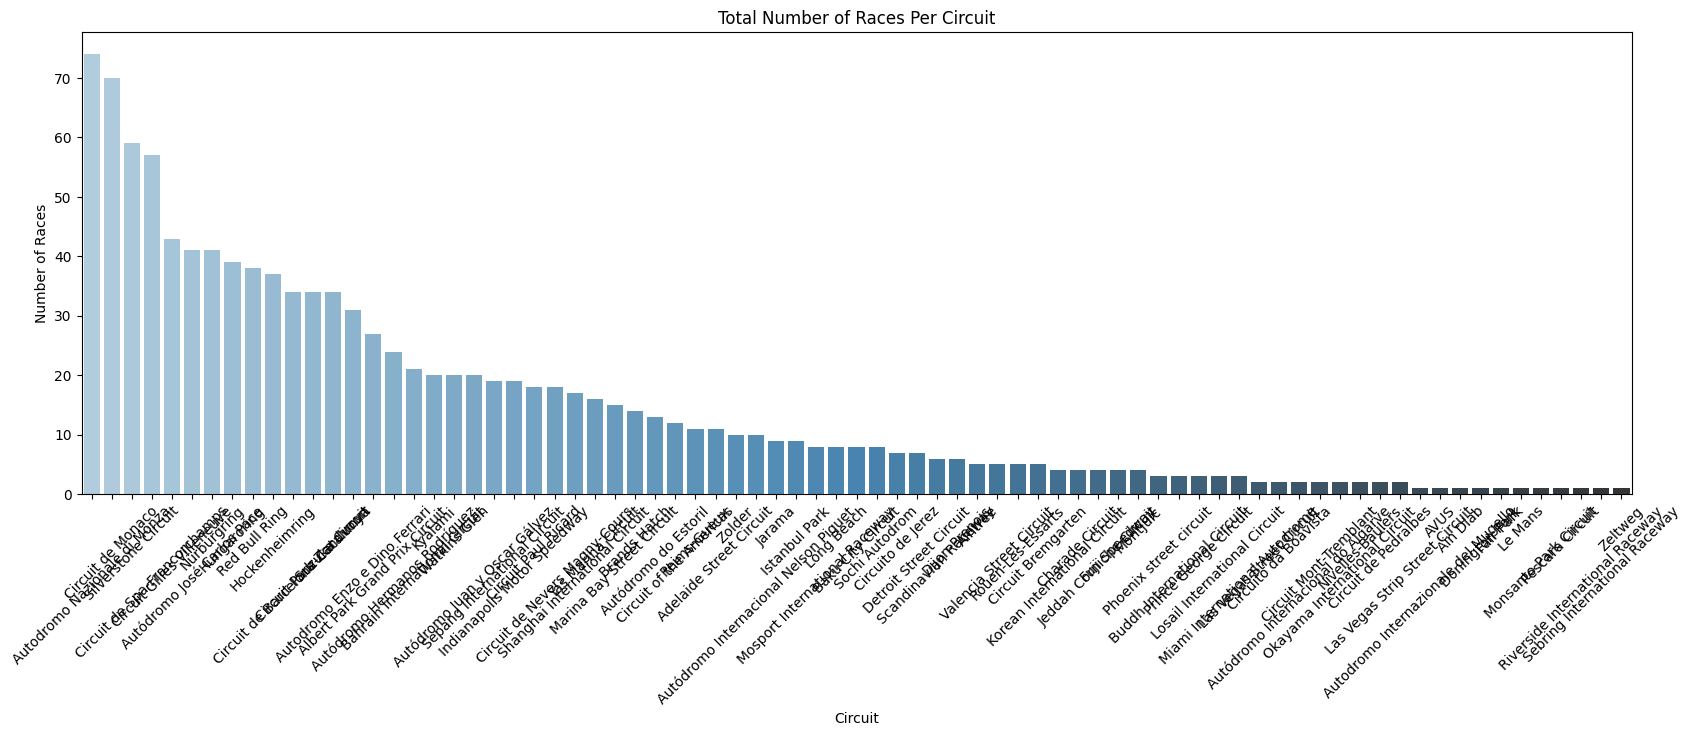

In [4]:
# Count total races per circuit
races_per_circuit = df.groupby('circuitName')['raceId'].nunique().reset_index().rename(columns={'raceId': 'total_races'})

# Sort by Number of Races (Descending)
races_per_circuit = races_per_circuit.sort_values(by='total_races', ascending=False).reset_index(drop=True)

# Preview the Data
print(races_per_circuit)

# Barplot for Races Per Circuit
plt.figure(figsize=(20, 6))
sns.barplot(data=races_per_circuit, x='circuitName', y='total_races', palette='Blues_d')
plt.title('Total Number of Races Per Circuit')
plt.xlabel('Circuit')
plt.ylabel('Number of Races')
plt.xticks(rotation=45)
plt.show()


In [5]:


# Step 2: Set Race Threshold (e.g., ≥5 races)
min_race_threshold = 0
established_circuits = races_per_circuit[races_per_circuit['total_races'] >= min_race_threshold]

# Step 3: Filter Data for Established Circuits
df_established_circuits = df[df['circuitName'].isin(established_circuits['circuitName'])]

# Step 4: Aggregate Driver Performance on Established Circuits
established_circuit_performance = df_established_circuits.groupby(['circuitName', 'driver']).agg(
    total_races=('raceId', 'nunique'),
    avg_finish=('positionOrder', 'mean'),
    avg_points=('points', 'mean'),
    total_points=('points', 'sum'),
    dnfs=('statusId', lambda x: (x != 1).sum()),  # Count DNFs (Did Not Finish)
).reset_index()
established_circuit_performance=established_circuit_performance[established_circuit_performance['total_races']>5]
# Step 5: Identify Struggling Driver Per Circuit (Worst Avg Finish)
dominating = established_circuit_performance.loc[
    established_circuit_performance.groupby('circuitName')['avg_finish'].idxmin()
]
dominating.reset_index(inplace=True)

print("Dominating Drivers on Established Circuits:")
print(dominating[['circuitName', 'driver', 'avg_finish', 'avg_points', 'total_races', 'dnfs']])


Dominating Drivers on Established Circuits:
                              circuitName              driver  avg_finish  \
0                 Adelaide Street Circuit              piquet    8.000000   
1          Albert Park Grand Prix Circuit            hamilton    5.750000   
2           Autodromo Enzo e Dino Ferrari  michael_schumacher    5.666667   
3            Autodromo Nazionale di Monza  michael_schumacher    5.235294   
4            Autódromo Hermanos Rodríguez            hamilton    3.000000   
5   Autódromo Internacional Nelson Piquet               prost    4.888889   
6              Autódromo José Carlos Pace      max_verstappen    3.333333   
7           Autódromo Juan y Oscar Gálvez              fangio    4.571429   
8                    Autódromo do Estoril               prost    5.111111   
9           Bahrain International Circuit            hamilton    3.705882   
10                      Baku City Circuit              vettel    3.500000   
11                           Bra

In [6]:


# Step 1: Count Total Races Per Circuit
races_per_circuit = df.groupby('circuitName')['raceId'].nunique().reset_index().rename(columns={'raceId': 'total_races'})

# Step 2: Set Race Threshold (e.g., ≥5 races)
min_race_threshold = 0
established_circuits = races_per_circuit[races_per_circuit['total_races'] >= min_race_threshold]

# Step 3: Filter Data for Established Circuits
df_established_circuits = df[df['circuitName'].isin(established_circuits['circuitName'])]

# Step 4: Aggregate Driver Performance on Established Circuits
established_circuit_performance = df_established_circuits.groupby(['circuitName', 'driver']).agg(
    total_races=('raceId', 'nunique'),
    avg_finish=('positionOrder', 'mean'),
    avg_points=('points', 'mean'),
    total_points=('points', 'sum'),
    dnfs=('statusId', lambda x: (x != 1).sum()),  # Count DNFs (Did Not Finish)
).reset_index()
established_circuit_performance=established_circuit_performance[established_circuit_performance['total_races']>5]
# Step 5: Identify Struggling Driver Per Circuit (Worst Avg Finish)
struggling_drivers = established_circuit_performance.loc[
    established_circuit_performance.groupby('circuitName')['avg_finish'].idxmax()
]
struggling_drivers.reset_index(inplace=True)
# Preview Struggling Drivers
print("Struggling Drivers on Established Circuits:")
print(struggling_drivers[['circuitName', 'driver', 'avg_finish', 'avg_points', 'total_races', 'dnfs']])


Struggling Drivers on Established Circuits:
                              circuitName              driver  avg_finish  \
0                 Adelaide Street Circuit              gachot   23.333333   
1          Albert Park Grand Prix Circuit            grosjean   15.000000   
2           Autodromo Enzo e Dino Ferrari            ghinzani   23.000000   
3            Autodromo Nazionale di Monza            ghinzani   19.857143   
4            Autódromo Hermanos Rodríguez             capelli   21.333333   
5   Autódromo Internacional Nelson Piquet            ghinzani   23.333333   
6              Autódromo José Carlos Pace              jarier   17.333333   
7           Autódromo Juan y Oscar Gálvez              jarier   18.500000   
8                    Autódromo do Estoril            ghinzani   22.666667   
9           Bahrain International Circuit               sutil   16.166667   
10                      Baku City Circuit          hulkenberg   14.333333   
11                           Bra